In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = '/mnist/src/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [2]:
!pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.14.0.32.55
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [3]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import transforms

In [ ]:
# 加载数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(
  root='./data',
  train = True,
  download=True,
  transform=transform
  )
test_dataset = datasets.MNIST(
  root='./data',
  train=False,
  download=True,
  transform=transform
)

train_loader = torch.utils.data.DataLoader(
  dataset=train_dataset,
  batch_size=len(train_dataset),
  shuffle=True
)
test_loader = torch.utils.data.DataLoader(
  dataset=test_dataset,
  batch_size=len(test_dataset),
  shuffle=False
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 13970342.47it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 421082.30it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3317862.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3348660.36it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
for images, labels in train_loader:
  X_train = images
  y_train = labels

for images, labels in test_loader:
  X_test = images
  y_test = labels

print("shape of X_train:", X_train.shape)
print("shape of y_train:", y_train.shape)

print("shape of X_test:", X_test.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: torch.Size([60000, 1, 28, 28])
shape of y_train: torch.Size([60000])
shape of X_test: torch.Size([10000, 1, 28, 28])
shape of y_test: torch.Size([10000])


In [ ]:
print(y_train)

tensor([5, 7, 3,  ..., 7, 0, 0])


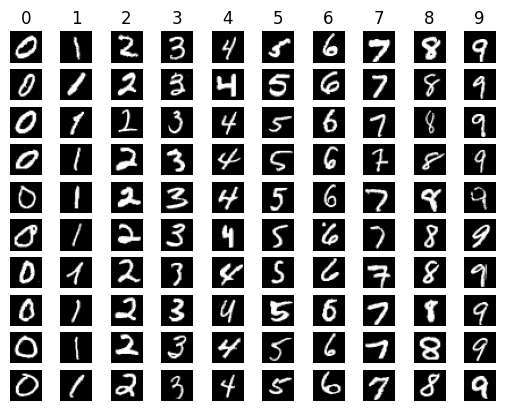

In [ ]:
# 可视化一些例子
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
  idxs = np.flatnonzero(y_train==int(y))
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * num_classes + y + 1
    plt.subplot(samples_per_class, num_classes, plt_idx)
    plt.imshow(X_train[idx][0].cpu().numpy(), cmap='gray')
    plt.axis("off")
    if i == 0:
      plt.title(cls)
plt.show()

In [ ]:
# 初步网络
class MyNet(torch.nn.Module):
  def __init__(self):
    super(MyNet, self).__init__()
    self.conv1 = torch.nn.Sequential(
        torch.nn.Conv2d(1, 10, kernel_size=5),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = torch.nn.Sequential(
        torch.nn.Conv2d(10, 20, kernel_size=5),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(kernel_size=2),
    )
    self.fc = torch.nn.Sequential(
        torch.nn.Linear(320, 50),
        torch.nn.Linear(50, 10),
    )
  def forward(self, x):
    batch_size = x.size(0)
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(batch_size, -1) # 展平
    x = self.fc(x)
    return x

In [ ]:
model = MyNet()
print(model)

MyNet(
  (conv1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=320, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=10, bias=True)
  )
)


In [ ]:
# Super Parameter
batch_size = 64
learning_rate = 1e-3
epochs = 10

In [ ]:
train_Loader = torch.utils.data.DataLoader(
  dataset=train_dataset,
  batch_size=batch_size,
  shuffle=True
)
test_Loader = torch.utils.data.DataLoader(
  dataset=test_dataset,
  batch_size=batch_size,
  shuffle=False
)

In [ ]:
for batch_idx, data in enumerate(train_Loader, 0):
  if batch_idx < 5:
    features, labels = data
    print(f"batch_idx:{batch_idx}, datashape:{features.shape}, labelshape:{labels.shape}")
  else:
    break

batch_idx:0, datashape:torch.Size([64, 1, 28, 28]), labelshape:torch.Size([64])
batch_idx:1, datashape:torch.Size([64, 1, 28, 28]), labelshape:torch.Size([64])
batch_idx:2, datashape:torch.Size([64, 1, 28, 28]), labelshape:torch.Size([64])
batch_idx:3, datashape:torch.Size([64, 1, 28, 28]), labelshape:torch.Size([64])
batch_idx:4, datashape:torch.Size([64, 1, 28, 28]), labelshape:torch.Size([64])


In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
loss_list = []
def train(epoch):
  running_loss = 0.0
  total = 0
  correct = 0
  for batch_idx, data in enumerate(train_Loader, 0):
    x, y = data
    optimizer.zero_grad()

    outputs = model(x)
    loss = loss_function(outputs, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    predicted_num, predicted_idx = torch.max(outputs.data, dim=1)

    total += x.shape[0]
    correct += (predicted_idx == y).sum().item()

    if (batch_idx + 1) % 300 == 0:
      print("epoch: %d, batch_idx: %d, loss: %.5f, train_acc: %.3f" % (epoch+1, batch_idx+1, running_loss/300, correct/total))
      epoch_fraction = epoch + (batch_idx + 1) / len(train_Loader)
      loss_list.append((epoch_fraction, running_loss / 300))
      running_loss = 0.0
      total = 0
      correct = 0
  if epoch == 4:
    torch.save(model.state_dict(), '/content/drive/MyDrive/mnist/src/checkpoints/model_5epochs_mnist.pth')
    torch.save(optimizer.state_dict(), '/content/drive/MyDrive/mnist/src/checkpoints/optimizer_5epochs_mnist.pth')
    print("model save successfully")
  if epoch == 9:
    torch.save(model.state_dict(), '/content/drive/MyDrive/mnist/src/checkpoints/model_10epochs_mnist.pth')
    torch.save(optimizer.state_dict(), '/content/drive/MyDrive/mnist/src/checkpoints/optimizer_9epochs_mnist.pth')
    print("model save successfully")
  return loss_list


In [ ]:
def test():
  correct = 0
  total = 0
  with torch.no_grad():
    for data in test_Loader:
      x , y = data
      outputs = model(x)
      predicted_num, predicted_idx = torch.max(outputs.data, dim=1)
      total += x.shape[0]
      correct += (predicted_idx == y).sum().item()
  acc = correct/total
  print("epoch: %d/%d, test_acc: %.3f" % (epoch+1, epochs, acc))
  return acc


In [ ]:
acc_list_test = []
for epoch in range(epochs):
  train(epoch)
  acc_epoch = test()
  acc_list_test.append(acc_epoch)

epoch: 1, batch_idx: 300, loss: 0.36550, train_acc: 0.890
epoch: 1, batch_idx: 600, loss: 0.11696, train_acc: 0.964
epoch: 1, batch_idx: 900, loss: 0.08598, train_acc: 0.975
epoch: 1/10, test_acc: 0.980
epoch: 2, batch_idx: 300, loss: 0.06486, train_acc: 0.980
epoch: 2, batch_idx: 600, loss: 0.05875, train_acc: 0.982
epoch: 2, batch_idx: 900, loss: 0.05853, train_acc: 0.982
epoch: 2/10, test_acc: 0.986
epoch: 3, batch_idx: 300, loss: 0.04662, train_acc: 0.985
epoch: 3, batch_idx: 600, loss: 0.04383, train_acc: 0.986
epoch: 3, batch_idx: 900, loss: 0.04546, train_acc: 0.986
model save successfully
epoch: 3/10, test_acc: 0.989
epoch: 4, batch_idx: 300, loss: 0.03641, train_acc: 0.989
epoch: 4, batch_idx: 600, loss: 0.03774, train_acc: 0.988
epoch: 4, batch_idx: 900, loss: 0.03982, train_acc: 0.988
epoch: 4/10, test_acc: 0.986
epoch: 5, batch_idx: 300, loss: 0.02984, train_acc: 0.990
epoch: 5, batch_idx: 600, loss: 0.03131, train_acc: 0.990
epoch: 5, batch_idx: 900, loss: 0.03348, train_a

<ipython-input-26-c7ca85cce187>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


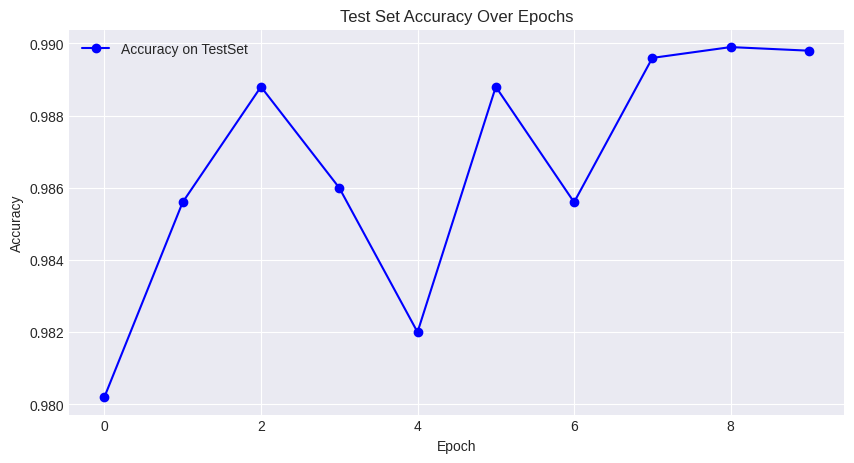

In [ ]:
plt.style.use('seaborn-darkgrid')

# 绘制测试集准确率
plt.figure(figsize=(10, 5))
plt.plot(acc_list_test, marker='o', linestyle='-', color='b', label='Accuracy on TestSet')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Set Accuracy Over Epochs')
plt.legend()
plt.show()

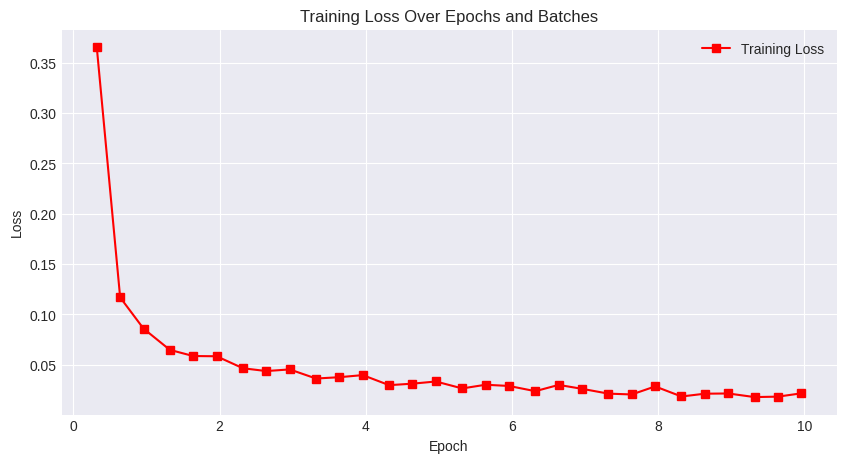

In [ ]:
# 提取 epoch_fraction 和 loss 数据
epoch_fractions, losses = zip(*loss_list)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(epoch_fractions, losses, marker='s', linestyle='-', color='r', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs and Batches')
plt.legend()
plt.show()